In [148]:
# import cleaned data (see other notebook)
import pandas as pd
df = pd.read_excel('../../all_data.xlsx')

# 看看有多少資料

In [149]:
# some descriptives
df['school'].value_counts()

北醫    510
輔仁     37
高醫     21
馬偕      5
Name: school, dtype: int64

In [150]:
df['year'].value_counts() # 只包含北醫的學生

101.0    165
102.0    139
99.0     101
98.0      90
100.0     23
Name: year, dtype: int64

In [151]:
df['實習醫院'].value_counts() # 只包含北醫的學生

北萬雙    193
雙和      56
萬芳      52
北醫      47
台大      23
馬偕      21
奇美      19
北榮      18
國泰      18
新光      13
林長      13
北慈       8
高長       8
成大       6
Name: 實習醫院, dtype: int64

In [152]:
df.groupby(by = 'year')['實習醫院'].value_counts() 

year   實習醫院
98.0   北萬雙      54
       奇美        6
       林長        6
       北榮        5
       國泰        5
       馬偕        5
       台大        4
       新光        3
       北慈        1
       成大        1
99.0   雙和       24
       萬芳       20
       北醫       15
       台大        9
       國泰        6
       奇美        6
       馬偕        6
       新光        5
       北榮        3
       高長        3
       北慈        2
       林長        2
101.0  北醫       32
       萬芳       32
       雙和       32
       北榮       10
       台大       10
       馬偕       10
       國泰        7
       奇美        7
       北慈        5
       成大        5
       新光        5
       林長        5
       高長        5
102.0  北萬雙     139
Name: 實習醫院, dtype: int64

來畫圖
1. groupby school (select 9998 only)
2. groupby hospital (select questions related to clerkship only)
3. groupby year (select 北醫 only)

In [153]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# set style
mpl.style.use("ggplot")

# plot inline
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei'] # for chinese font usage 
plt.rcParams['axes.unicode_minus']=False

In [154]:
# 垃圾東西丟一丟
df.drop(columns = ['Unnamed: 0', '#', 'Start Date (UTC)', 'Submit Date (UTC)', 'Network ID', '此問卷之對象為輔仁大學醫學系畢業生請問你是今年(105)輔大醫學系的畢業生嗎？'], inplace = True)

In [155]:
df = df.loc[:, df.columns.sort_values()] # 按照題號排好

In [156]:
# groupby year
df_m = df.loc[df['school']=='北醫'].groupby(by = 'year').mean().transpose()

In [157]:
for i in range(len(df_m.index)):
    print(i, df_m.index[i])

0  [公共衛生行政體系]
1  [地區醫院]
2  [基層醫療診所]
3  [基礎醫學研究]
4  [我已經清楚未來職涯的規劃方向]
5  [我計劃在國外發展]
6  [臨床醫學研究]
7  [醫學中心及區域醫院]
8  [醫學教育研究]
9 1 整體醫學教育 [我很滿意本系的醫學教育品質]
10 1 整體醫學教育 [本系之教學目標、教學方法、評分有互相配合]
11 1 整體醫學教育 [本系之教育使我學到具醫療專業素養之醫療照護]
12 1 整體醫學教育 [本系之教育使我有機會參與醫學科學研究]
13 1 整體醫學教育 [本系之醫學知識、臨床技能與人文教育並重3 列]
14 1 整體醫學教育 [清楚本系及各學科的教學目標]
15 2-1: 課程-通識課程 [內容合宜]
16 2-1: 課程-通識課程 [學分下限適中]
17 2-1: 課程-通識課程 [對我很有幫助]
18 2-1: 課程-通識課程 [必修課外，有足夠的時間可安排修通識課程]
19 2-1: 課程-通識課程 [課程選項多元]
20 2-2: 課程-服務學習課程 [份量適中]
21 2-2: 課程-服務學習課程 [內容合宜]
22 2-2: 課程-服務學習課程 [對我很有幫助]
23 2-3: 課程-人文醫學課程 [份量適中]
24 2-3: 課程-人文醫學課程 [內容合宜]
25 2-3: 課程-人文醫學課程 [對我很有幫助]
26 2-3: 課程-人文醫學課程 [有與臨床應用整合]
27 2-4: 小組討論課程（ PBL等小組討論課程 ） [份量適中]
28 2-4: 小組討論課程（ PBL等小組討論課程 ） [內容合宜]
29 2-4: 小組討論課程（ PBL等小組討論課程 ） [對我很有幫助]
30 2-4: 小組討論課程（ PBL等小組討論課程 ） [有與臨床應用整合]
31 2-6: 基礎醫學課程 [份量適中]
32 2-6: 基礎醫學課程 [內容合宜]
33 2-6: 基礎醫學課程 [對我很有幫助]
34 2-6: 基礎醫學課程 [有與臨床應用整合]
35 2-6: 基礎醫學課程 [評量方式公平合宜]
36 2-7: 下列基礎醫學課程對我很有幫助 [公共衛生學]
37 2-7: 下列基礎醫學課程對我很有幫助 [寄生蟲學]
38 2-7: 下列基礎醫學課程對我很有幫助 [微生物免疫學]
3

In [158]:
def plot_mean(df, start, end):
    
    df_m = df.iloc[start:end, :]
    fig = plt.figure(figsize = (5,(end-start)*0.5))
    ax = fig.add_subplot(1, 2, 1)
    plt.pcolor(df_m, cmap='coolwarm', vmin=1, vmax=5)
    plt.title('分數平均值', fontsize = 'large')
    plt.colorbar()
    ax.set_xticks(np.arange(0.5, df_m.shape[1], 1.0))
    ax.set_xticklabels(df.columns, fontsize ='large', rotation = 30)
    plt.gca().invert_yaxis()
    ax.set_yticks(np.arange(0.5, df_m.shape[0], 1.0))
    ax.set_yticklabels(list(df_m.index.values), fontsize ='large')

    fig.text(0.46, 0.445, '平均分數', va='center', )
# 十分有趣的事情是：六年制在臨床實習的滿意度普遍比七年制高 (雖然沒有檢測 statistical significance)

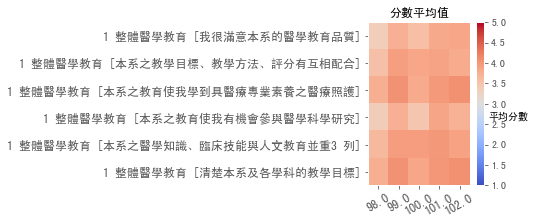

In [159]:
plot_mean(df_m, 9,15)

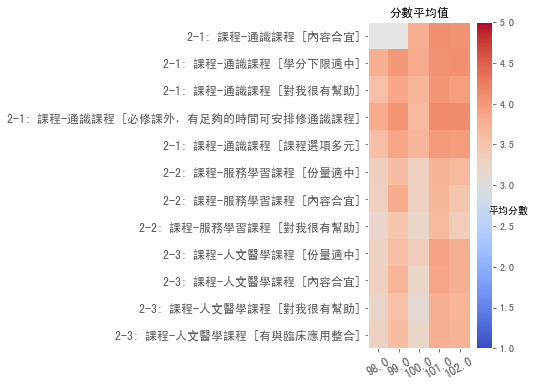

In [160]:
plot_mean(df_m, 15,27)

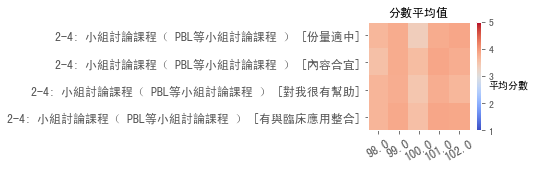

In [161]:
plot_mean(df_m, 27,31)

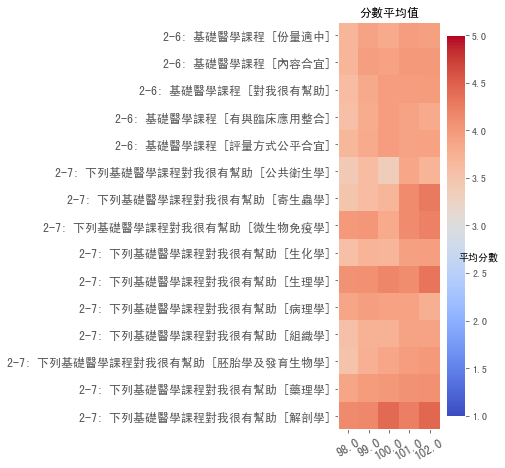

In [162]:
plot_mean(df_m, 31,46)

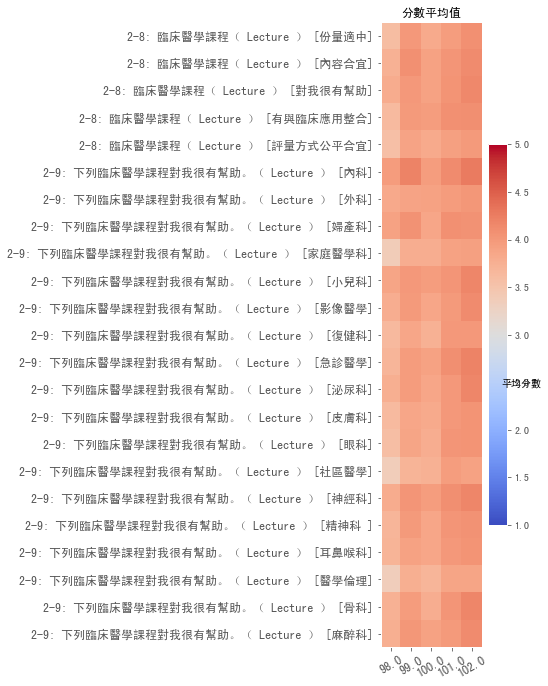

In [163]:
plot_mean(df_m, 46,69)

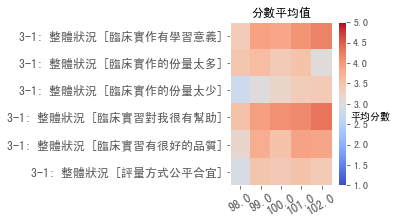

In [164]:
plot_mean(df_m, 69,75)

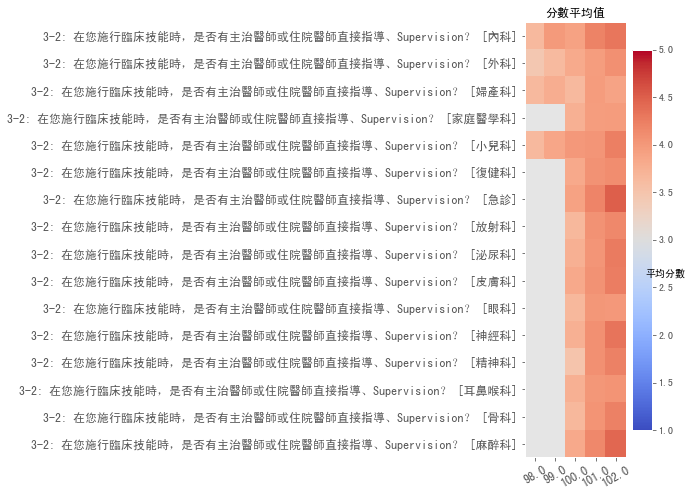

In [165]:
plot_mean(df_m, 75,91)

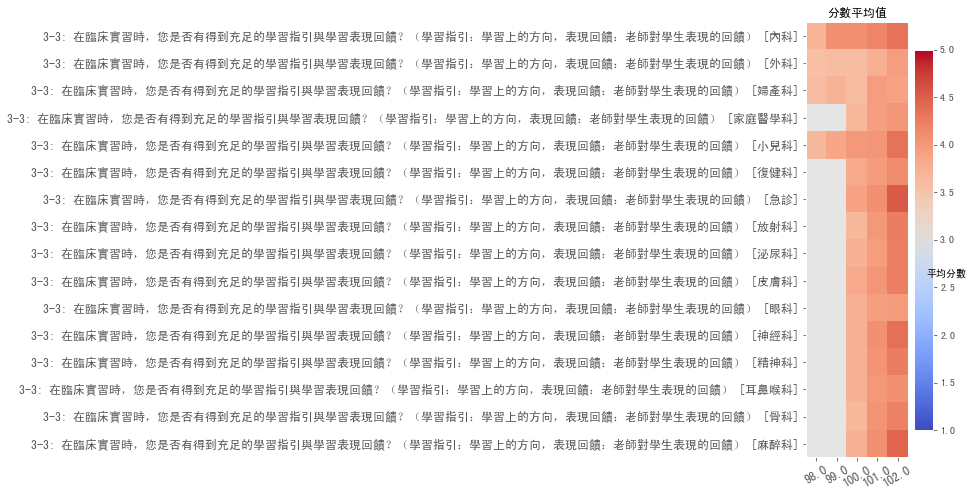

In [166]:
plot_mean(df_m, 91,107)

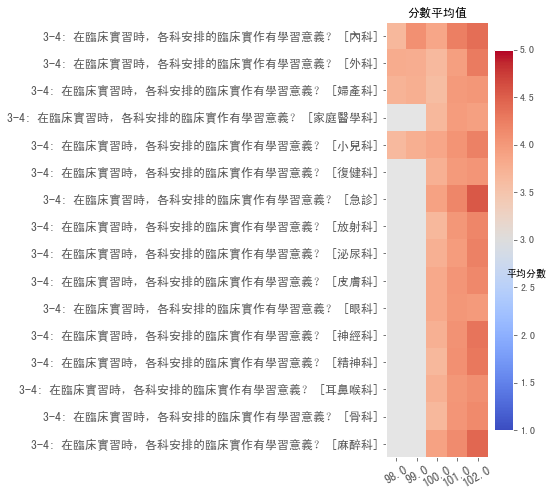

In [167]:
plot_mean(df_m, 107,123)

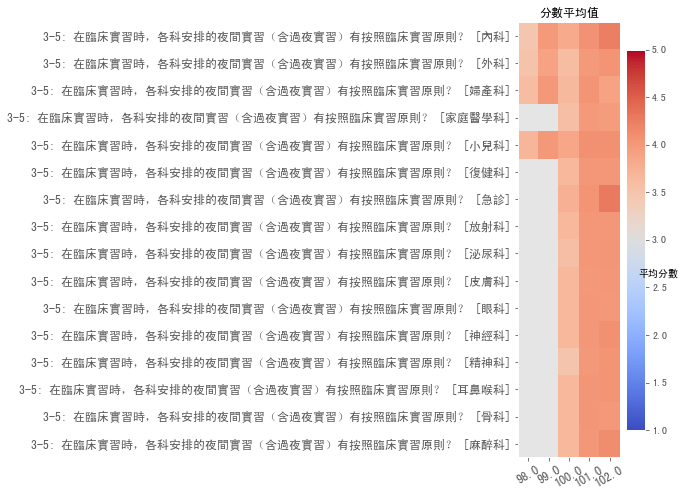

In [168]:
plot_mean(df_m, 123,139)

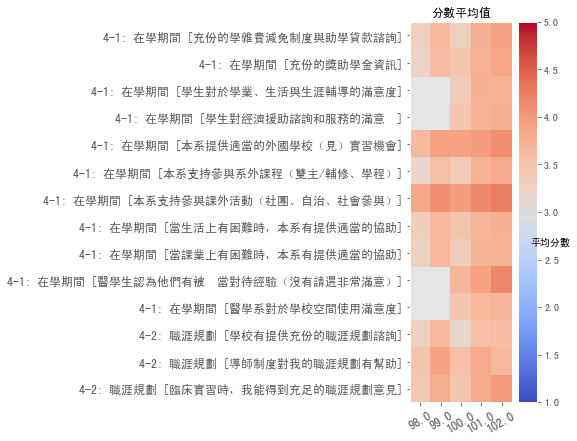

In [169]:
plot_mean(df_m, 139,153)

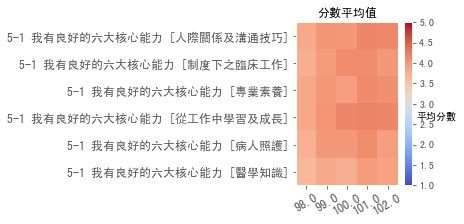

In [170]:
plot_mean(df_m, 153,159)

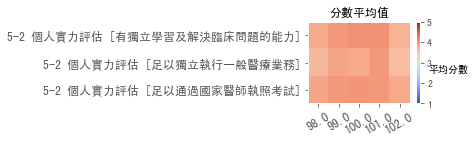

In [171]:
plot_mean(df_m, 159,162)

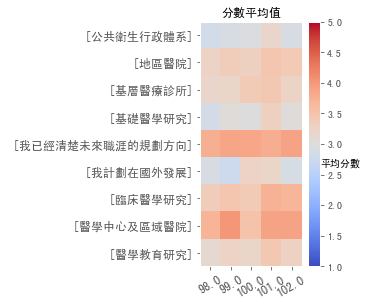

In [172]:
plot_mean(df_m, 0,9)

In [173]:
specialty = df.loc[df['school']=='北醫'].groupby(by = 'year')['我計劃專科醫師選科的第一志願（不當醫師可跳過。沒有選項請選其他，並在三個志願後面填寫）'].value_counts(normalize = True).unstack().transpose()

Text(0.46, 0.445, '比例')

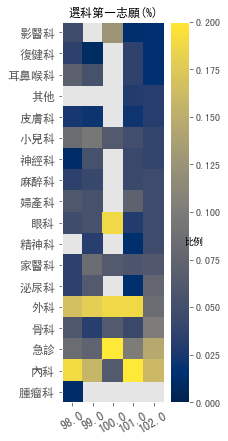

In [174]:
s = specialty.sort_values(by = 102)
fig = plt.figure(figsize = (5,7))
ax = fig.add_subplot(1, 2, 1)
plt.pcolor(s, cmap='cividis', vmin=0, vmax=0.2)
plt.title('選科第一志願(%)', fontsize = 'large')
plt.colorbar()
ax.set_xticks(np.arange(0.5, s.shape[1], 1.0))
ax.set_xticklabels(s.columns.values, fontsize ='large', rotation = 30)
plt.gca().invert_yaxis()
ax.set_yticks(np.arange(0.5, s.shape[0], 1.0))
ax.set_yticklabels(list(s.index.values), fontsize ='large')

fig.text(0.46, 0.445, '比例', va='center', )

In [177]:
specialty = df.loc[df['school']=='北醫'].groupby(by = 'year')['我計劃專科醫師選科的第二志願'].value_counts(normalize = True).unstack().transpose()

Text(0.46, 0.445, '比例')

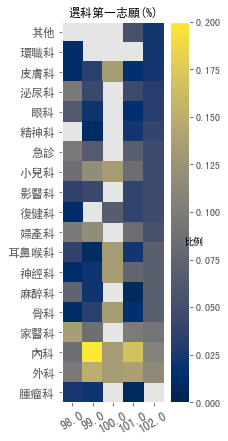

In [178]:
s = specialty.sort_values(by = 102)
fig = plt.figure(figsize = (5,7))
ax = fig.add_subplot(1, 2, 1)
plt.pcolor(s, cmap='cividis', vmin=0, vmax=0.2)
plt.title('選科第二志願(%)', fontsize = 'large')
plt.colorbar()
ax.set_xticks(np.arange(0.5, s.shape[1], 1.0))
ax.set_xticklabels(s.columns.values, fontsize ='large', rotation = 30)
plt.gca().invert_yaxis()
ax.set_yticks(np.arange(0.5, s.shape[0], 1.0))
ax.set_yticklabels(list(s.index.values), fontsize ='large')

fig.text(0.46, 0.445, '比例', va='center', )

Text(0.46, 0.445, '比例')

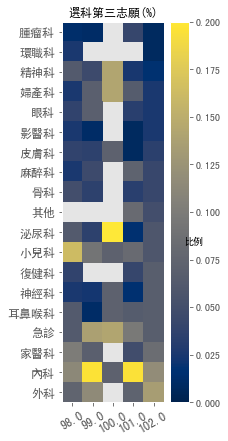

In [180]:
specialty = df.loc[df['school']=='北醫'].groupby(by = 'year')['我計劃專科醫師選科的第三志願'].value_counts(normalize = True).unstack().transpose()
s = specialty.sort_values(by = 102)
fig = plt.figure(figsize = (5,7))
ax = fig.add_subplot(1, 2, 1)
plt.pcolor(s, cmap='cividis', vmin=0, vmax=0.2)
plt.title('選科第三志願(%)', fontsize = 'large')
plt.colorbar()
ax.set_xticks(np.arange(0.5, s.shape[1], 1.0))
ax.set_xticklabels(s.columns.values, fontsize ='large', rotation = 30)
plt.gca().invert_yaxis()
ax.set_yticks(np.arange(0.5, s.shape[0], 1.0))
ax.set_yticklabels(list(s.index.values), fontsize ='large')

fig.text(0.46, 0.445, '比例', va='center', )